## Identifying entiment polarity

I used a package called 'textblob' to identify sentiment polarity from above reviews

### Packages

In [2]:
from cleaning import data_cleaning
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

### Make sure data is clean before visualizating

Ï found out there are "❎", "|", "✅" which cannot be decoded and analyzed.
The line of code below is to remove these undefined characters.


In [5]:
data_cleaning('BA_reviews.csv', 'cleaned_BA_reviews.csv')

### Calculate satisfaction level

In [5]:
feedback_df = pd.read_csv('BA_reviews.csv')
feedback_df['sentiment'] = feedback_df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

num_negative = len(feedback_df[feedback_df['sentiment'] < -0.2])
num_neutral = len(feedback_df[(feedback_df['sentiment'] >= -0.2) & (feedback_df['sentiment'] <= 0.2)])
num_positive = len(feedback_df[feedback_df['sentiment'] > 0.2])

total_feedback = len(feedback_df)
negative_percent = (num_negative / total_feedback) * 100
neutral_percent = (num_neutral / total_feedback) * 100
positive_percent = (num_positive / total_feedback) * 100

print(f"Negative feedback: {negative_percent:.2f}%")
print(f"Neutral feedback: {neutral_percent:.2f}%")
print(f"Positive feedback: {positive_percent:.2f}%")

Negative feedback: 7.60%
Neutral feedback: 70.80%
Positive feedback: 21.60%


#### Visualize the results

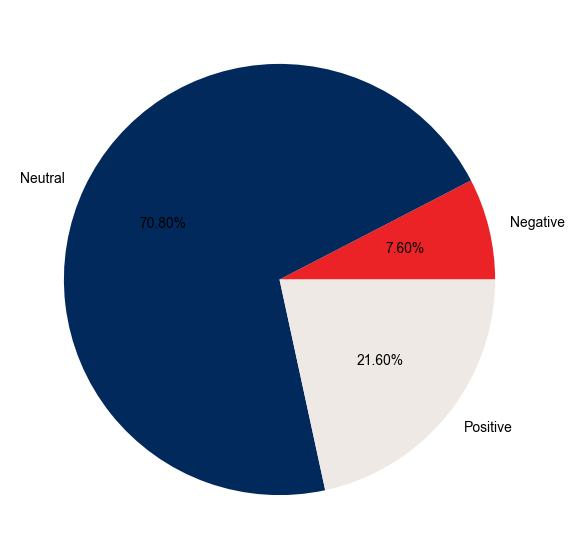

In [10]:
satisfaction_level = ['Negative', 'Neutral', 'Positive']
data = [negative_percent, neutral_percent, positive_percent]
color_scheme = ["#eb2226", "#01295c", "#efe9e5",] #red, white, blue as British Airway color palette
# Create a figure and set its size
fig = plt.figure(figsize=(10, 7))
# Plot the pie chart
plt.pie(data, labels=satisfaction_level, autopct='%1.2f%%', colors=color_scheme, )

# Show the chart
plt.show()